In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random                   ##import all the libary 
import math
from tqdm import tqdm
import csv
import pandas as pd

In [3]:
_DATA_SET="D:/Dataset/Cifar10"                   #add the path of the folder
path=os.path.join(_DATA_SET,"train")

In [4]:
data=[]
catagories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']   
csv_file=os.path.join(_DATA_SET,"trainLabels.csv")   
df=pd.read_csv(csv_file)    ###read the csv file

for img in tqdm(os.listdir(path)): 
    img_split=img.split('.')   #split the imgage
    img_label=img_split[0]     #take the number of the image
    img_label_index=int(img_label)-1   #make it a integer value 
    img_arr=cv2.imread(os.path.join(path,img))  ##read the images 
    class_name=catagories.index(df['label'][img_label_index]) ##take the label from csv file
    data.append([img_arr,class_name])   ## store image with the label 

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [06:39<00:00, 125.31it/s]


In [6]:
temp=data[:]
random.shuffle(temp)    ##shuffle it

In [7]:
f1=[]
f2=[]
f3=[]
f4=[]
f5=[]
f1 = temp[0:10000]                     
f2 = temp[10000:20000]
f3 = temp[20000:30000]            ## make 5 folder and store the data 
f4 = temp[30000:40000]
f5 = temp[40000:50000]

In [8]:
test1=f1+f2+f3+f4
valid1=f5
test2=f1+f2+f3+f5             
valid2=f4
test3=f1+f2+f4+f5
valid3=f3
test4=f1+f3+f4+f5                      ##add 4 folder together and 1 valid folder different
valid4=f2
test5=f2+f3+f4+f5
valid5 =f1

In [9]:
training_set_list= [test1,test2,test3,test4,test5]                    
validation_set_list= [valid1,valid2,valid3,valid4,valid5]

In [10]:
data_length=len(f1)           ##take the length of a folder
dts=[]
for i in range(5):
    correct=[0]*20    
    for  valid_data in validation_set_list[i]:                
        sortitem=[]
        for  train_data in training_set_list[i]:
            distance= np.abs(valid_data[0]-train_data[0])   ##distance of a validate image and train image
            distance_summation=np.sum(distance)    ##sum the distance
            category_sum=[train_data[1],distance_summation]   ##store the category lavel and distance
            sortitem.append(category_sum)      
        sortitem.sort(key = lambda x: x[1])    ##sort the distances of the images
        ctgr=[0]*10
        for k in range(20):
            ctgr[sortitem[k][0]]+=1              ##take first 20 distance and store the lavel of the distance
            maximum=max(ctgr)                ##take the maximum lavel 
            b=ctgr.index(maximum)       ##take the index number of that lavel
            for w in range(10):
                if(valid_data[1]==b):    ##check the valid data lavel and the maximum lavel match or not 
                    correct[k]+=1
                    break
    accurecy=[]
    for j in range(20):
        accurecy.append(correct[j]/data_length)         ##measure the accuracy
    dts.append(accurecy)    

<ipython-input-15-1a30ce5e32b4>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


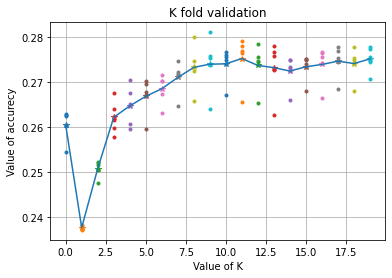

In [15]:
x=[0]*20

for i in range(5):
    for j in range(20):  
        x[j]=x[j]+dts[i][j]/5              ##find the mid point
        plt.plot(j,dts[i][j],'.')
for i in range(0,20):
    plt.plot(i,x[i],'*')

t=[ k for k in range(0,20)]
ax=plt.axes()
ax.plot(t,(x))
    
plt.grid()
plt.xlabel('Value of K')
plt.ylabel('Value of accurecy')
plt.title('K fold validation')
  
plt.show()
    
